# Importar pacotes
## pandas, numpy, matplotlib.pyplot, seaborn
## sklearn: train_test_split, confusion_matrix

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

# Aplicar no *dataset* Iris

In [0]:
df = pd.read_csv('iris.csv')

In [46]:
df.head()

,Id,sepal.length,sepal.width,petal.length,petal.width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [0]:
# Criar atributo meta
y = df.species

# Eliminar a coluna 'Id' e criar atributos preditores
X = df.drop(['Id', 'species'], axis=1)

In [0]:
# Inicialmente, vamos criar uma Árvore de Decisão utilizando TODO O CONJUNTO DE DADOS

In [0]:
# Definir o modelo
arvore = DecisionTreeClassifier(criterion='entropy',
                                random_state=2020)

# Ajustar o modelo aos pontos do conjunto de dados
arvore.fit(X,y)

In [0]:
# Desenhando a árvore 
tree.plot_tree(arvore);

In [0]:
# Desenhando a árvore um pouco maior (figsize=(12,10))
plt.figure(figsize=(12,10))
tree.plot_tree(arvore);

In [0]:
# Dando nomes às classes
plt.figure(figsize=(12,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(arvore,
               class_names=nome_classes);

In [0]:
# Dando nome e cor às classes
plt.figure(figsize=(12,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(arvore,
               class_names=nome_classes,
               filled=True);

In [0]:
# Dando nome e cor às classes E nome aos atributos
plt.figure(figsize=(12,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
nome_atributos=['slen', 'swidth', 'plen', 'pwidth']
tree.plot_tree(arvore,
               class_names=nome_classes,
               feature_names=nome_atributos,
               filled=True);

In [0]:
# Aumentando o tamanho da figura e da fonte
plt.figure(figsize=(15,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
nome_atributos=['slen', 'swidth', 'plen', 'pwidth']
tree.plot_tree(arvore,
               class_names=nome_classes,
               feature_names=nome_atributos,
               fontsize=12,
               filled=True);

In [0]:
# Salvando a figura (.png)
fig, axes = plt.subplot(nrows=1, ncols=1, figsize=(15,10))
plt.figure(figsize=(15,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
nome_atributos=['slen', 'swidth', 'plen', 'pwidth']
tree.plot_tree(arvore,
               class_names=nome_classes,
               feature_names=nome_atributos,
               fontsize=12,
               filled=True);
fig.savefig('FA084_Iris_Tree.png')

In [0]:
# Repetir todo o processo, alterando alguns parâmetros:
#    max_depth
#    min_samples_split
#    min_samples_leaf

# Atividade Prática (ÁRVORE DE DECISÃO)

## 1. Criar conjuntos de Treino e Teste (70/30) e random_state=2020  
## 2. Construir **ÁRVORE DE DECISÃO** (Usar Cross-Validation, com 10 folds) no conjunto de treino variando:  
> - Número mínimo de registros para 'split' (considerar 5, 10, 15 e 20)  
> - Número mínimo de registros na 'folha'   (considerar 2, 4, 6, 8 e 10)  
> - Profundidade máxima da árvore           (considerar 2, 3, 4 e 5)  
## 3. Selecionar os parâmetros ótimos (min_samples_split, min_samples_leaf, max_depth)  
## 4. Avaliar o modelo com os parâmetros ótimos no conjunto de teste  
> - Apresentar a Figura da Árvore
> - Apresentar a Acurácia
> - Apresentar a Matriz de Confusão


In [0]:
# Criar atributo meta
y = df.species

# Eliminar a coluna 'Id' e criar atributos preditores
X = df.drop(['Id', 'species'], axis=1)

In [50]:
# Criar conjuntos de treino e teste com Scikit-learn. Random_state = 2020
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 2020)
# Verificar dimensões de X, X_train e X_test
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (105, 4) (45, 4)


In [0]:
# Criar listas com valores de 'split', 'leaf', 'depth'
split = list(range(5,25,5))
leaf = list(range(2,12,2))
depth = list(range(2,6,1))

In [0]:
# Criar uma lista vazia com os 'scores' para cada iteração da Validação Cruzada
# A Validação Cruzada será feita com 10 subconjuntos (10-fold Cross Validation)
split_scores = [ ]
leaf_scores = [ ]
depth_scores = [ ]

In [0]:
# Realizar a Validação Cruzada com 10 subconjuntos (ou 10 pastas)

for i in split:
  dtc = DecisionTreeClassifier(random_state=0,
                               min_samples_split=i)
  scores = cross_val_score(dtc,X_train,y_train,
                           cv=10,
                           scoring='accuracy')
  split_scores.append(scores.mean())

In [0]:
split_otimo = split[split_scores.index(max(split_scores))]
split_otimo

5

In [0]:
# Realizar a Validação Cruzada com 10 subconjuntos (ou 10 pastas)

for j in leaf:
  dtc = DecisionTreeClassifier(min_samples_leaf=j)
  scores = cross_val_score(dtc,X_train,y_train,
                           cv=10,
                           scoring='accuracy')
  leaf_scores.append(scores.mean())

In [0]:
leaf_otimo = leaf[leaf_scores.index(max(leaf_scores))]
leaf_otimo

2

In [0]:
# Realizar a Validação Cruzada com 10 subconjuntos (ou 10 pastas)

for k in depth:
  dtc = DecisionTreeClassifier(max_depth=k)
  scores = cross_val_score(dtc,X_train,y_train,
                           cv=10,
                           scoring='accuracy')
  depth_scores.append(scores.mean())

In [0]:
depth_otimo = depth[depth_scores.index(max(depth_scores))]
depth_otimo

4

In [0]:
for i in split:
  for j in leaf:
    for k in depth:
      dtc = DecisionTreeClassifier(min_samples_split=i)
      scores = cross_val_score(dtc,X_train,y_train,
                              cv=10,
                              scoring='accuracy')
      split_scores.append(scores.mean())

      dtc = DecisionTreeClassifier(min_samples_leaf=j)
      scores = cross_val_score(dtc,X_train,y_train,
                              cv=10,
                              scoring='accuracy')
      leaf_scores.append(scores.mean())
      
      dtc = DecisionTreeClassifier(max_depth=k)
      scores = cross_val_score(dtc,X_train,y_train,
                              cv=10,
                              scoring='accuracy')
      depth_scores.append(scores.mean())

In [0]:
split_otimo = split[split_scores.index(max(split_scores))]
split_otimo

5

In [0]:
leaf_otimo = leaf[leaf_scores.index(max(leaf_scores))]
leaf_otimo

2

In [0]:
depth_otimo = depth[depth_scores.index(max(depth_scores))]
depth_otimo

4

In [0]:
for i in split:
  for j in leaf:
    for k in depth:
      dtc = DecisionTreeClassifier(min_samples_split=i, min_samples_leaf=j, max_depth=k)
      scores = cross_val_score(dtc,X_train,y_train,
                              cv=10,
                              scoring='accuracy')
      split_scores.append(scores.mean())
      leaf_scores.append(scores.mean())
      depth_scores.append(scores.mean())

In [54]:
split_otimo = split[split_scores.index(max(split_scores))]
print(split_otimo)

leaf_otimo = leaf[leaf_scores.index(max(leaf_scores))]
print(leaf_otimo)

depth_otimo = depth[depth_scores.index(max(depth_scores))]
print(depth_otimo)

5
2
2


In [55]:
# Definir o modelo
arvore = DecisionTreeClassifier(criterion='entropy',
                                max_depth=depth_otimo,
                                min_samples_split=split_otimo,
                                min_samples_leaf=leaf_otimo,
                                random_state=2020)

# Ajustar o modelo aos pontos do conjunto de dados
arvore.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

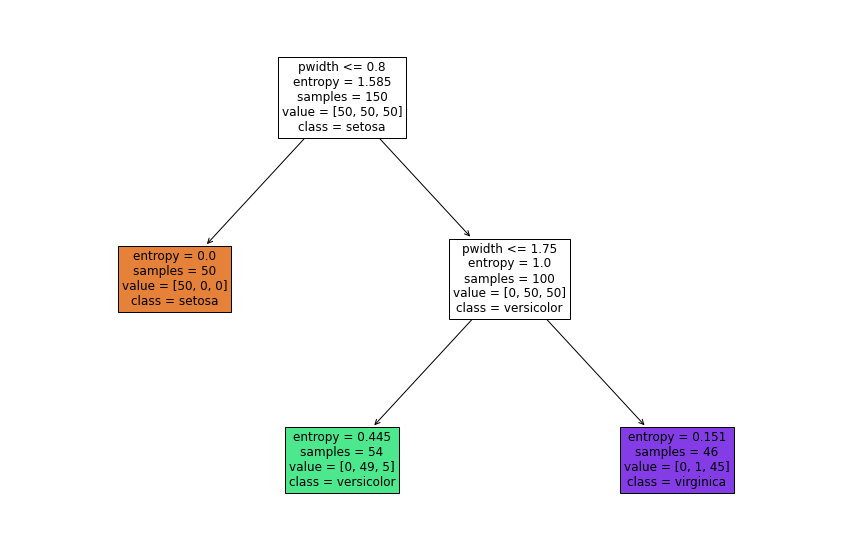

In [56]:
# Árvore de decisão
plt.figure(figsize=(15,10))
nome_classes = ['setosa', 'versicolor', 'virginica']
nome_atributos=['slen', 'swidth', 'plen', 'pwidth']
tree.plot_tree(arvore,
               class_names=nome_classes,
               feature_names=nome_atributos,
               fontsize=12,
               filled=True);
plt.savefig('FA084_Iris_Tree.png')

In [57]:
# Verificar a acurácia do modelo (score)
arvore_score=arvore.score(X_test, y_test)
arvore_score

0.9111111111111111

In [0]:
y_pred = arvore.predict(X_test)

In [61]:
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy k=11: ', acc)

Accuracy k=11:  0.9111111111111111


In [62]:
MatConf = confusion_matrix(y_test, y_pred)
MatConf

array([[18,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 11]])

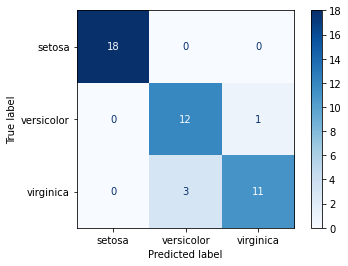

In [92]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(arvore, X_test, y_test, cmap='Blues', values_format='.3g');
plt.savefig('Tree_Confusion.png')

# Atividade Prática (REGRESSÃO LOGÍSTICA)

## 1. Criar conjuntos de Treino e Teste (70/30) e random_state=2020  
## 2. Construir um **MODELO DE REGRESSÃO LOGÍSTICA** no conjunto de treino. 
## 3. Avaliar o modelo no conjunto de teste  
> - Apresentar a Acurácia
> - Apresentar a Matriz de Confusão

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Criar atributo meta
y = df.species

# Eliminar a coluna 'Id' e criar atributos preditores
X = df.drop(['Id', 'species'], axis=1)

In [66]:
# Criar conjuntos de treino e teste com Scikit-learn. Random_state = 2020
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 2020)
# Verificar dimensões de x, x_train e x_test
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (105, 4) (45, 4)


In [0]:
# Definir técnica/modelo
lr=LogisticRegression()

In [71]:
# Ajustar os pontos do conjunto de treino utilizando a técnica anteriormente definida
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Fazer predição no conjunto de teste, utilizando o modelo lr anteriormente ajudstado
y_pred=lr.predict(X_test)

In [74]:
# Verificar Matriz de Confusão
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 11,  2],
       [ 0,  2, 12]])

In [75]:
# Para rotular, vamos usar um DataFrame com os índices (linhas) e colunas
colunas = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=colunas)
pd.DataFrame(a, index=colunas, columns=colunas)

,setosa,versicolor,virginica
setosa,18,0,0
versicolor,0,11,2
virginica,0,2,12


In [76]:
# Outro jeito de gerar uma Matriz de Confusão com rótulos, utilizando 'crosstab' (Pandas)
pd.crosstab(y_test, y_pred, rownames=['Obs'], colnames=['Pred'], margins=True)

Pred,setosa,versicolor,virginica,All
Obs,,,,
setosa,18,0,0,18
versicolor,0,11,2,13
virginica,0,2,12,14
All,18,13,14,45


In [77]:
# Verificar a acurácia do modelo (score)
lr_score=lr.score(X_test, y_test)
lr_score

0.9111111111111111

In [78]:
# Verificar a probabilidade associada a cada registro
lr.predict_proba(X_test)

array([[1.46173837e-05, 2.65163684e-02, 9.73469014e-01],
       [9.64386656e-01, 3.56131629e-02, 1.81146533e-07],
       [2.25358197e-02, 8.67061875e-01, 1.10402305e-01],
       [4.09533922e-03, 7.89592944e-01, 2.06311717e-01],
       [8.83017275e-03, 8.00729316e-01, 1.90440512e-01],
       [9.03356715e-04, 6.77333886e-01, 3.21762758e-01],
       [2.18833587e-04, 2.00667715e-01, 7.99113451e-01],
       [1.08551739e-01, 8.89142169e-01, 2.30609149e-03],
       [9.37912738e-01, 6.20854775e-02, 1.78420716e-06],
       [9.55023434e-01, 4.49759411e-02, 6.24527248e-07],
       [1.53844039e-04, 1.45608319e-01, 8.54237837e-01],
       [1.01438438e-02, 7.22669263e-01, 2.67186894e-01],
       [9.68741731e-01, 3.12580676e-02, 2.01017072e-07],
       [2.10019781e-03, 4.94578728e-01, 5.03321074e-01],
       [7.15073529e-04, 2.69579696e-01, 7.29705231e-01],
       [9.80088100e-01, 1.99117488e-02, 1.51632137e-07],
       [1.79152353e-02, 9.54086051e-01, 2.79987132e-02],
       [9.87334223e-03, 7.75380

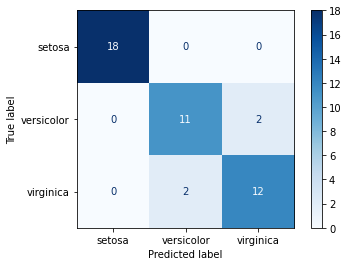

In [79]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', values_format='.3g');
plt.savefig('Logistic_Confusion.png')

# Atividade Prática (KNN)

## 1. Criar conjuntos de Treino e Teste (70/30) e random_state=2020  
## 2. Classificar usando **KNN** (Usar Cross-Validation, com 10 folds) no conjunto de treino variando K:  
## 3. Selecionar o K ótimo
## 4. Avaliar o modelo com K ótimo no conjunto de teste  
> - Apresentar a Acurácia
> - Apresentar a Matriz de Confusão


In [0]:
# Importar bibliotecas específicas do sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [0]:
# Criar atributo meta
y = df.species

# Eliminar a coluna 'Id' e criar atributos preditores
X = df.drop(['Id', 'species'], axis=1)

In [0]:
# Importar train_test_split de Scikit-learn
from sklearn.model_selection import train_test_split

In [83]:
# Criar conjuntos de treino e teste com Scikit-learn. Random_state = 2020
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 2020)
# Verificar dimensões de X, X_train e X_test
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (105, 4) (45, 4)


In [0]:
# Encontrar o KNN ótimo no conjunto de treino, usando Validação Cruzada

In [0]:
# Criar uma lista com valores ímpares (1 a 19) para K vizinhos mais próximos (KNN)
kvizinhos = list(range(1,20,2))

In [0]:
# Criar uma lista vazia com os 'scores' para cada iteração da Validação Cruzada
# A Validação Cruzada será feita com 10 subconjuntos (10-fold Cross Validation)
cv_scores = [ ]

In [0]:
# Realizar a Validação Cruzada com 10 subconjuntos (ou 10 pastas)

for K in kvizinhos:
  knn = KNeighborsClassifier(n_neighbors=K)
  scores = cross_val_score(knn,X_train,y_train,
                           cv=10,
                           scoring='accuracy')
  cv_scores.append(scores.mean())

In [87]:
# Melhor acurácia
k_otimo = kvizinhos[cv_scores.index(max(cv_scores))]
k_otimo

11

In [0]:
#Definir o classificador usando KNeighborsClassifier do sklearn
knn11=KNeighborsClassifier(n_neighbors=k_otimo, metric='euclidean')

In [89]:
#Construir o modelo com o classificador definido anteriormente
knn11.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [90]:
# Verificar a acurácia do modelo (score)
knn_score=knn11.score(X_test, y_test)
knn_score

0.9333333333333333

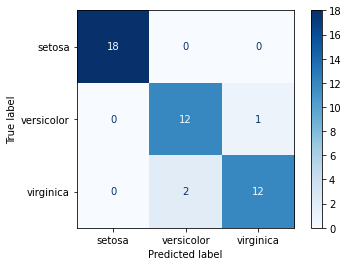

In [91]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(knn11, X_test, y_test, cmap='Blues', values_format='.3g');
plt.savefig('KNN_Confusion.png')

# FAZER UMA DISCUSSÃO CRÍTICA ACERCA DOS RESULTADOS OBTIDOS COM OS MODELOS
## Construa tabelas, gráficos, etc. para subsidiar suas conclusões

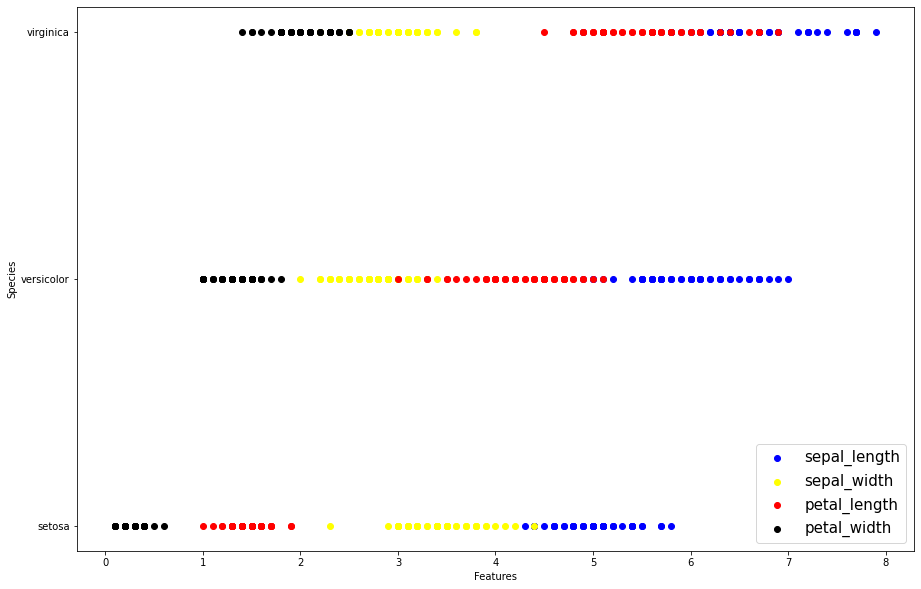

In [93]:
# Plot the relation of each feature with each species

plt.figure(figsize=(15,10))

plt.xlabel('Features')
plt.ylabel('Species')

pltX = df.loc[:, 'sepal.length']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = df.loc[:, 'sepal.width']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color='yellow', label='sepal_width')

pltX = df.loc[:, 'petal.length']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = df.loc[:, 'petal.width']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':15})
#plt.show()

plt.savefig('Atributos.png')

O atributo petal_width e petal_length apresentam baixa entropia para a espécie setosa, possibilitando assim a sua separação do restante das espécies.
Dessa forma, um modelo poderia obter acurácia de 100% ao classificar as flores em "setosa" e "não-setosa" pelos atributos petal_width e petal_length.

In [94]:
acuracia = {'Modelos': ['Tree', 'Logistic', 'KNN'], 'Acurácia': [arvore_score, lr_score, knn_score]}
dacuracia=pd.DataFrame(acuracia)
dacuracia

,Modelos,Acurácia
0,Tree,0.911111
1,Logistic,0.911111
2,KNN,0.933333


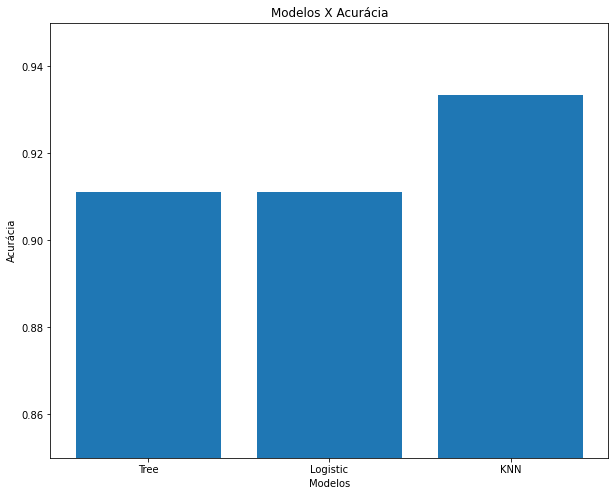

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8));

plt.bar(dacuracia['Modelos'], dacuracia['Acurácia']);

plt.title('Modelos X Acurácia')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.ylim(0.85, 0.95);

plt.savefig('Acuracia.png')

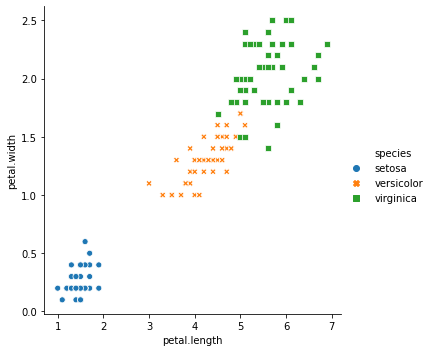

In [96]:
sns.relplot(x='petal.length', y='petal.width', hue='species', style='species', data=df);

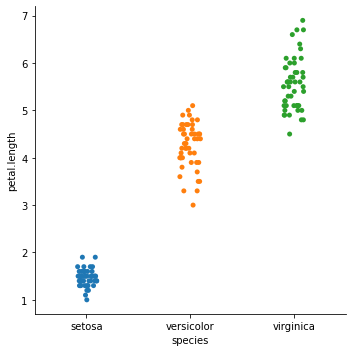

In [97]:
sns.catplot(x='species', y='petal.length', data=df);

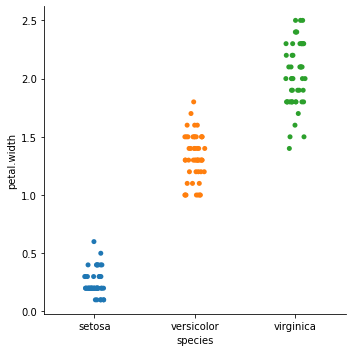

In [98]:
sns.catplot(x='species', y='petal.width', data=df)

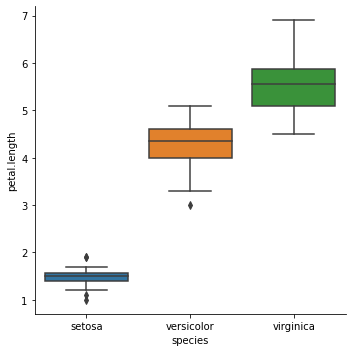

In [99]:
sns.catplot(x='species', y='petal.length', kind='box', data=df);

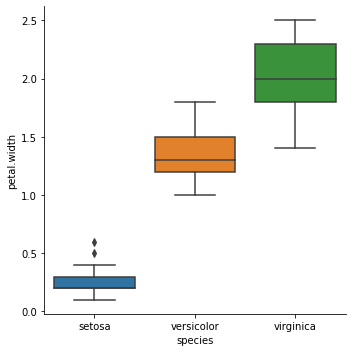

In [100]:
sns.catplot(x='species', y='petal.width', kind='box', data=df);